<a href="https://colab.research.google.com/github/alexapruiz/Projetos/blob/master/Aula_014_Deploy_de_uma_API_para_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/eds.png" height="100px"></p>

# Deploy API para Machine Learning



### Boston Housing Dataset

In [ ]:
!pip install tensorflow==2.0.0 -q

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_targets)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100)

Train on 303 samples
Epoch 1/100
303/303 [==============================] - 0s 2ms/sample - loss: 362.6757 - mae: 16.2579
Epoch 2/100
303/303 [==============================] - 0s 66us/sample - loss: 204.9808 - mae: 11.4519
Epoch 3/100
303/303 [==============================] - 0s 61us/sample - loss: 75.2409 - mae: 6.2407
Epoch 4/100
303/303 [==============================] - 0s 61us/sample - loss: 55.1349 - mae: 5.3445
Epoch 5/100
303/303 [==============================] - 0s 59us/sample - loss: 81.7341 - mae: 6.5138
Epoch 6/100
303/303 [==============================] - 0s 61us/sample - loss: 34.8936 - mae: 3.8780
Epoch 7/100
303/303 [==============================] - 0s 63us/sample - loss: 18.3131 - mae: 2.8936
Epoch 8/100
303/303 [==============================] - 0s 69us/sample - loss: 23.2187 - mae: 3.3605
Epoch 9/100
303/303 [==============================] - 0s 63us/sample - loss: 19.5045 - mae: 2.9767
Epoch 10/100
303/303 [==============================] - 0s 59us/sample - los

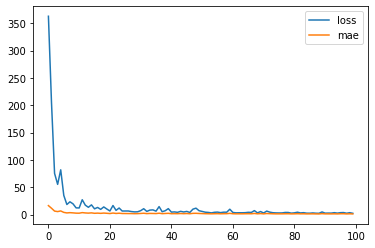

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
mae_test = model.evaluate(X_test, y_test)

101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
model.save('boston_housing_model.h5')

In [ ]:
columns = ["crim", "zn", "indus", "chas", "nox", "rm",
           "age", "dis", "rad", "tax", "ptratio", "b",
           "lstat", "medv"]

In [ ]:
values = [0.42846914, -0.43794015, 1.00374252,-0.25865307,0.81616309,
          -0.0362377, -0.13055102, -0.38236272, 1.64473362,1.54819626,
          0.75572396, 0.44036105, 0.07417893]

In [ ]:
import json
values_json = {"valores": dict(zip(columns, values))}

In [ ]:
with open('valores.json', 'w') as json_file:
    json.dump(values_json, json_file)

In [ ]:
dict(zip(columns, values))

{'age': -0.13055102,
 'b': 0.44036105,
 'chas': -0.25865307,
 'crim': 0.42846914,
 'dis': -0.38236272,
 'indus': 1.00374252,
 'lstat': 0.07417893,
 'nox': 0.81616309,
 'ptratio': 0.75572396,
 'rad': 1.64473362,
 'rm': -0.0362377,
 'tax': 1.54819626,
 'zn': -0.43794015}

In [ ]:
lista = list(zip(columns, values))

In [ ]:
X_predict = np.asarray(list(values_json['valores'].values()))

In [ ]:
values_json

{'valores': {'age': -0.13055102,
  'b': 0.44036105,
  'chas': -0.25865307,
  'crim': 0.42846914,
  'dis': -0.38236272,
  'indus': 1.00374252,
  'lstat': 0.07417893,
  'nox': 0.81616309,
  'ptratio': 0.75572396,
  'rad': 1.64473362,
  'rm': -0.0362377,
  'tax': 1.54819626,
  'zn': -0.43794015}}

In [ ]:
X_predict

array([ 0.42846914, -0.43794015,  1.00374252, -0.25865307,  0.81616309,
       -0.0362377 , -0.13055102, -0.38236272,  1.64473362,  1.54819626,
        0.75572396,  0.44036105,  0.07417893])

In [ ]:
float(model.predict(X_predict.reshape(1,-1))[0])

22.953990936279297